<a href="https://colab.research.google.com/github/tanjatang/Educational_Video_recommender/blob/master/Feature_analysis_for_educational_vedio_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the data set
Upload the two data sets to the local memory.

In [38]:
# Load the csv's
import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/tel_youtube_content_train(original).csv")
evaluation_data = pd.read_csv("/content/tel_youtube_content_evaluation_students(original).csv")

2. Data cleaning & exploratory data analysis

In [50]:
# Drop rows with NaN values 
train_data=train_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# Drop duplicates objects
train_data.drop_duplicates(inplace=True)
evaluation_data["title"] = evaluation_data["title"].fillna("T")
evaluation_data["transcript"] = evaluation_data["transcript"].fillna("TR")
evaluation_data["external_rating"] = evaluation_data["external_rating"].fillna(0)
evaluation_data["viewcount"] = evaluation_data["viewcount"].fillna(0)
evaluation_data["length"] = evaluation_data["length"].fillna(0)

Visualize the correlation among atrributs

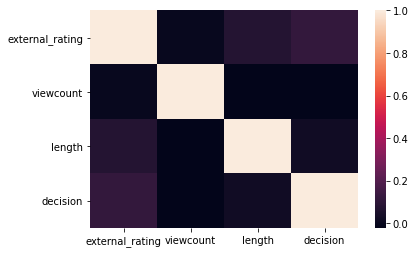

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# train_data.corr()
sns.heatmap(train_data.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


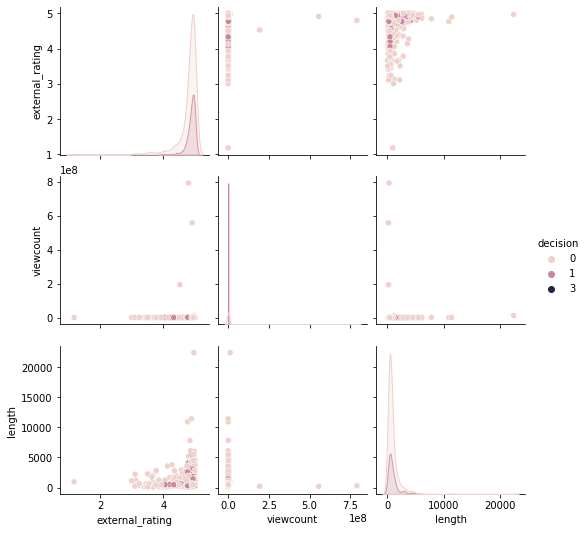

In [41]:
sns.pairplot(train_data ,hue ='decision')

In [42]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# Measure the similarity between two title and transcripts using cosine similarity

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
def cos_similarity(data):
  similarities = []
  stemmer = PorterStemmer()
  sw = stopwords.words('english')
 
  for _, row in data.iterrows():
    
    X = row.title.lower()
    Y = row.transcript.lower()
      
    # tokenization
    X_list = word_tokenize(X)
    X_list = [stemmer.stem(w) for w in X_list]
    Y_list = word_tokenize(Y)
    Y_list = [stemmer.stem(w) for w in Y_list]
      
    # sw contains the list of stopwords 
    l1 =[];l2 =[]
      
    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}
    Y_set = {w for w in Y_list if not w in sw}
      
    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0
      
    # cosine formula  
    for i in range(len(rvector)):
            c+= l1[i]*l2[i]
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    similarities.append(cosine)
  return similarities


In [51]:
# Add features 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

full = pd.concat([train_data, evaluation_data]).groupby('author')['external_rating'].mean()

train_data["title_length"] = train_data.title.map(lambda x: len(x))
train_data["topic_length"] = train_data.topic.map(lambda x: len(x))
train_data["content_density"] = train_data.transcript.map(lambda x: len(str(x))) / train_data.length
train_data["transcript_sparsity"] = train_data.transcript.map(lambda x: len(vectorizer.fit_transform([str(x)]).toarray()))
train_data["topic_title_sim"] = cos_similarity(train_data)
train_data["external_rating_viewcount"] = (train_data["external_rating"]*train_data["viewcount"])/(train_data["external_rating"]+0.9*train_data["viewcount"])
train_data["length"] = train_data["length"]

evaluation_data["external_rating_viewcount"] = (evaluation_data["external_rating"]*evaluation_data["viewcount"])/(evaluation_data["external_rating"]+0.9*evaluation_data["viewcount"])
evaluation_data["title_length"] = evaluation_data.title.map(lambda x: len(x))
evaluation_data["topic_length"] = evaluation_data.topic.map(lambda x: len(x))
evaluation_data["content_density"] = evaluation_data.transcript.map(lambda x: len(str(x))) / evaluation_data.length
evaluation_data["transcript_sparsity"] = evaluation_data.transcript.map(lambda x: len(vectorizer.fit_transform([str(x)]).toarray()))
evaluation_data["topic_title_sim"] = cos_similarity(evaluation_data)
evaluation_data["length"] = evaluation_data["length"]


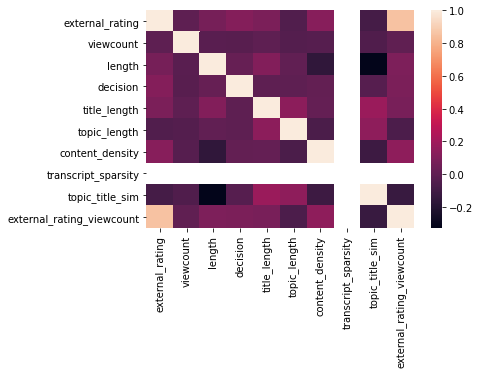

In [52]:
sns.heatmap(train_data.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

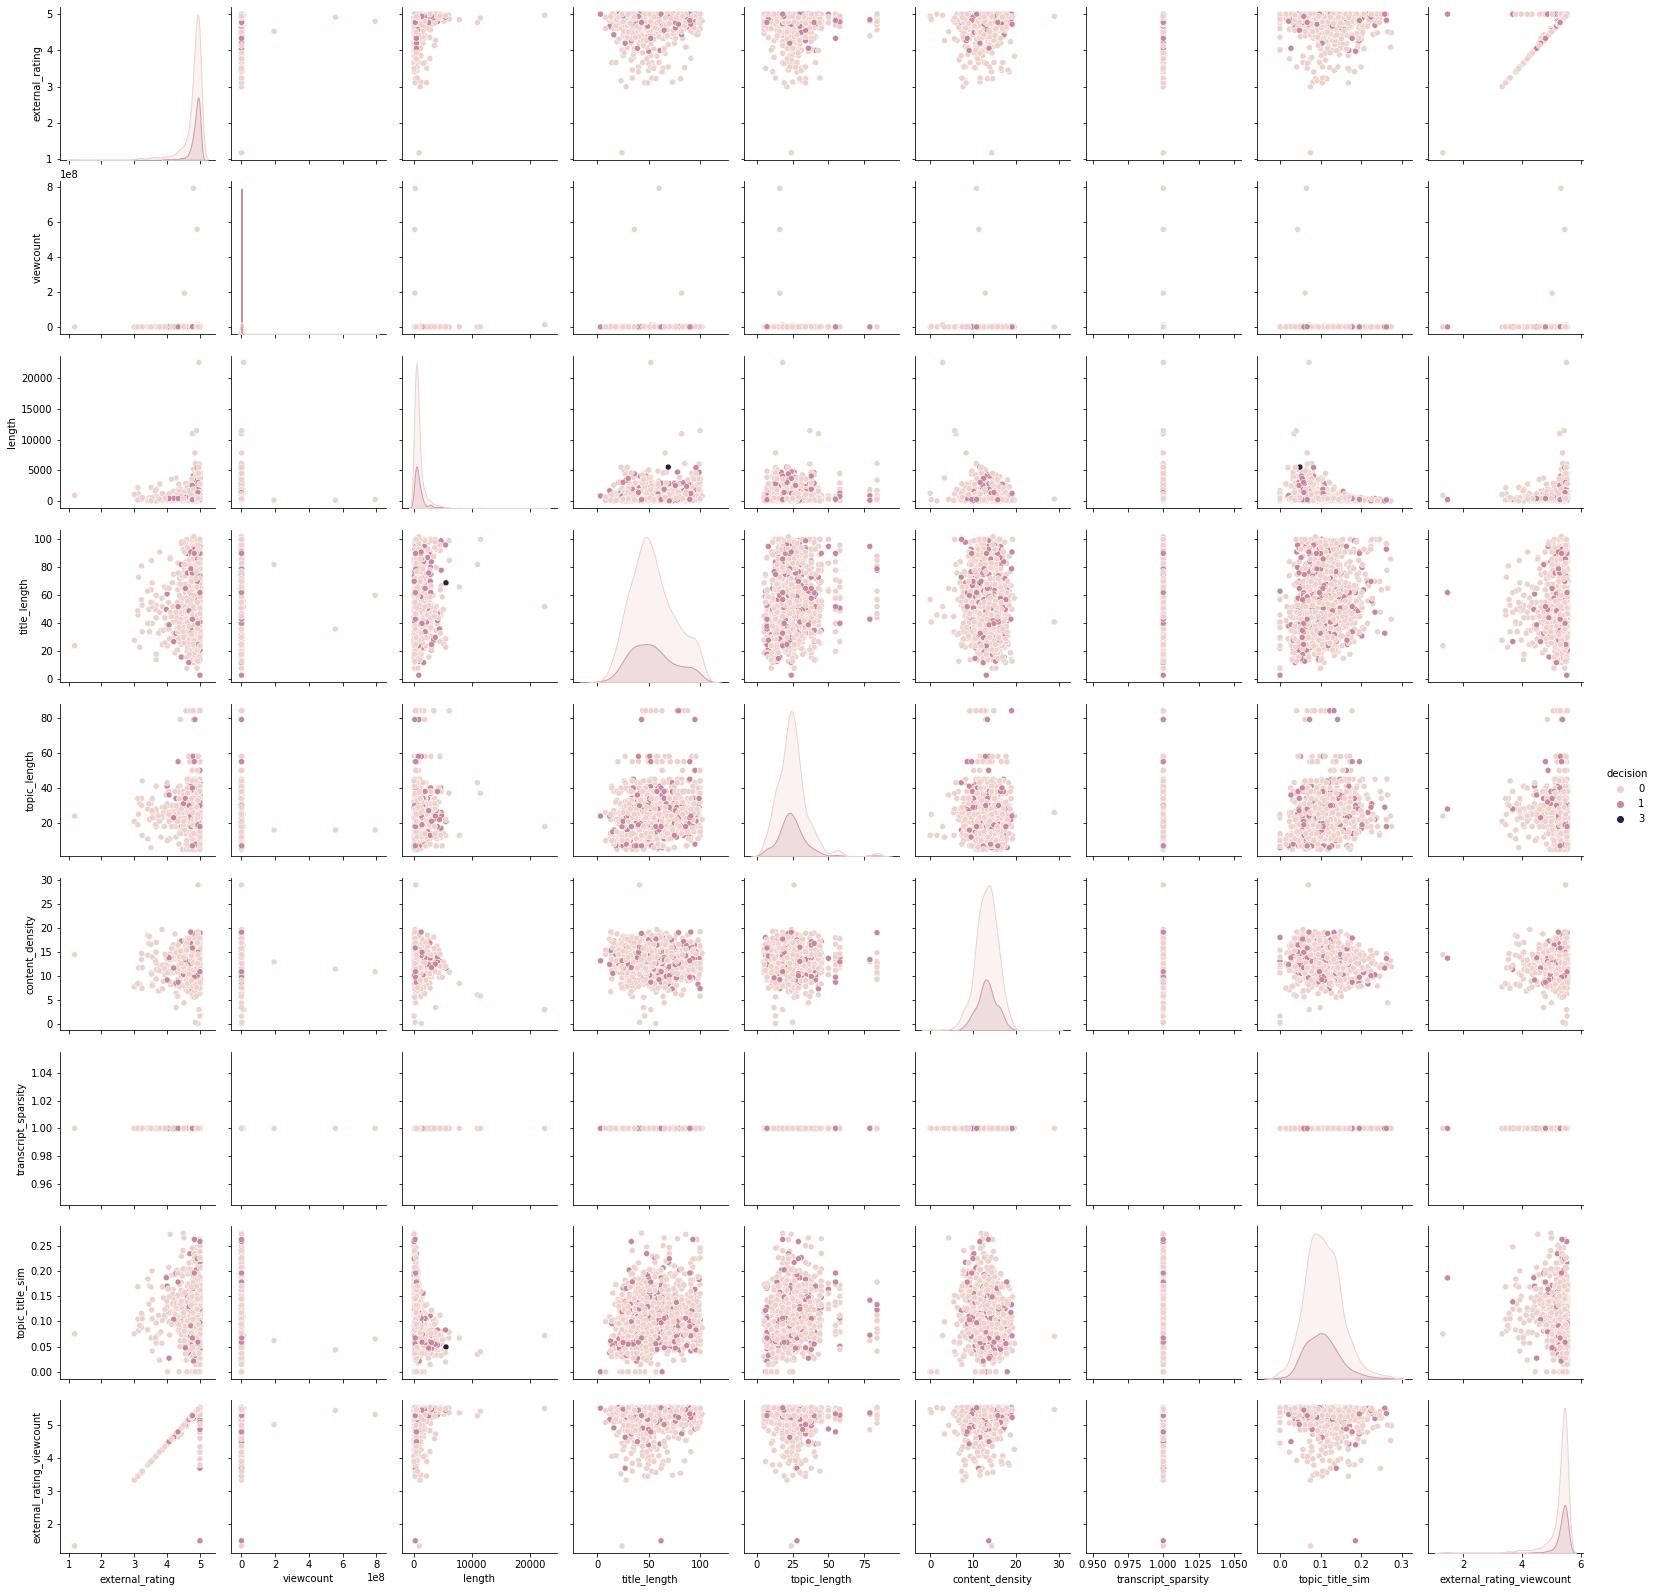

In [53]:
sns.pairplot(train_data ,hue ='decision')

4. Split training and validation dataset

In [54]:
from sklearn.model_selection import train_test_split
X = train_data.loc[:,["title_length","topic_length","content_density","transcript_sparsity","topic_title_sim"]]
Y = train_data.loc[:,'decision']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

5. creat voting classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
voting_clf = VotingClassifier(estimators=[
    ('Random_forest',RandomForestClassifier(n_estimators=50, random_state=0)),
    ("LDA",LinearDiscriminantAnalysis()),
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=100))
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


6. results

In [56]:
# %% evaluate the result
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[222   0]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       222
           1       0.00      0.00      0.00        60

    accuracy                           0.79       282
   macro avg       0.39      0.50      0.44       282
weighted avg       0.62      0.79      0.69       282

0.7872340425531915


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


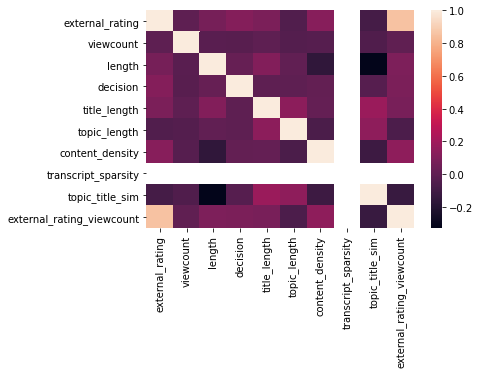

In [57]:
sns.heatmap(train_data.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

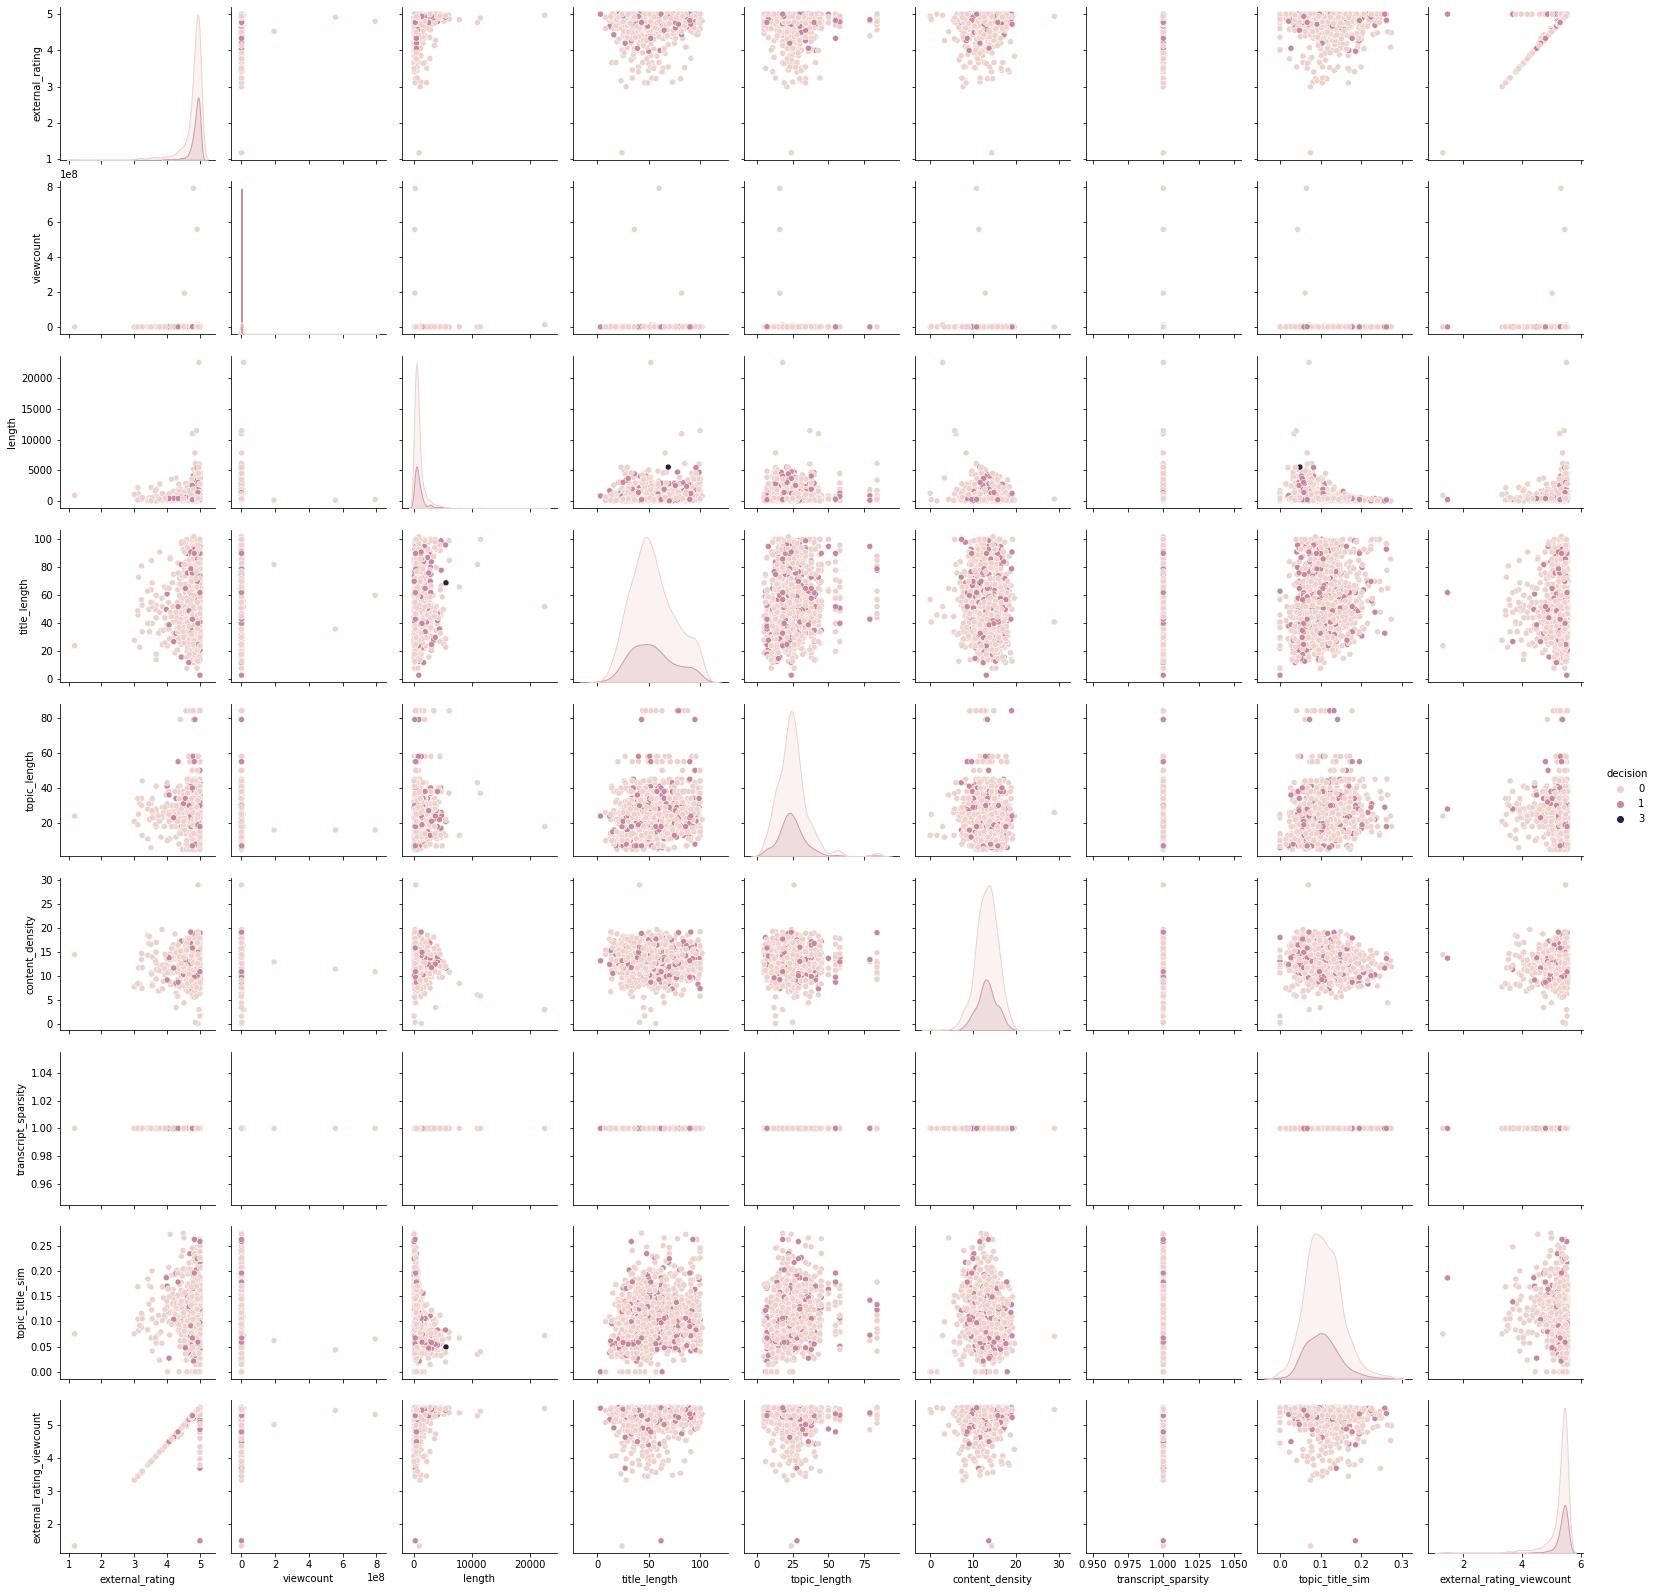

In [58]:
sns.pairplot(train_data ,hue ='decision')